### Project 2 - Predicting Hospital Readmissions

* Problem: Predict hospital readmissions within 30 days.
* Objective: Build a predictive model for high-risk patients.
* Tasks:
    - Data Preprocessing
    - Feature Engineering
    - Model Building
    - Model Evaluation

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings("ignore")

## Read the Dataframe

In [49]:
df1 = pd.read_csv("hospital_with_actual_A1C.csv")
df2 = pd.read_csv("hospital_with_predicted_A1C.csv")

In [50]:
# Concatenate the two DataFrames along the rows (axis=0)
final_df = pd.concat([df1, df2], axis=0)

# Reset the index of the concatenated DataFrame
final_df.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
final_df.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,0,2,1,75,29,4,0,3,5,1,0
1,0,0,1,28,19,4,0,3,7,1,1
2,1,2,2,70,23,1,2,4,6,1,0
3,1,1,3,41,24,4,0,0,3,0,0
4,0,1,3,68,14,2,4,2,5,0,0


In [51]:
final_df['A1C_Result'].value_counts()

A1C_Result
0    566
1    434
Name: count, dtype: int64

In [52]:
#shape
final_df.shape

(1000, 11)

In [53]:
# info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Gender                 1000 non-null   int64
 1   Admission_Type         1000 non-null   int64
 2   Diagnosis              1000 non-null   int64
 3   Num_Lab_Procedures     1000 non-null   int64
 4   Num_Medications        1000 non-null   int64
 5   Num_Outpatient_Visits  1000 non-null   int64
 6   Num_Inpatient_Visits   1000 non-null   int64
 7   Num_Emergency_Visits   1000 non-null   int64
 8   Num_Diagnoses          1000 non-null   int64
 9   A1C_Result             1000 non-null   int64
 10  Readmitted             1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


In [54]:
#null
final_df.isnull().sum()

Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [55]:
#duplicates
final_df.duplicated().sum()

np.int64(0)

In [56]:
#unique
final_df.nunique()

Gender                    3
Admission_Type            3
Diagnosis                 4
Num_Lab_Procedures       99
Num_Medications          30
Num_Outpatient_Visits     5
Num_Inpatient_Visits      5
Num_Emergency_Visits      5
Num_Diagnoses             9
A1C_Result                2
Readmitted                2
dtype: int64

In [57]:
for column in final_df.columns:
    unique_values = final_df[column].unique()
    print(f"'{column}':\n {unique_values}\n")

'Gender':
 [0 1 2]

'Admission_Type':
 [2 0 1]

'Diagnosis':
 [1 2 3 0]

'Num_Lab_Procedures':
 [75 28 70 41 68 99 56 64 62 18 19 87 82  6 59 43 80 66  8 13 94 84 88 86
 93  9 37 74 36 92 42 85 72 48 91 67 45 10  1 32 71 17 65 26 98 69 11 76
 60 40  5 21  4 15 46 24 63 57 49 53 23 95  3 51 38 58 50 30 25 27 78 47
 39 16 81 52 34 73 55 96 35 33 61 29 83 44  7 12 20 90 89  2 54 79 97 22
 77 31 14]

'Num_Medications':
 [29 19 23 24 14  2 28  5  4 22 17 20 25 35 11  9 10  1 15  8 12 18 27  3
 26 13 16 21  7  6]

'Num_Outpatient_Visits':
 [4 1 2 3 0]

'Num_Inpatient_Visits':
 [0 2 4 1 3]

'Num_Emergency_Visits':
 [3 4 0 2 1]

'Num_Diagnoses':
 [5 7 6 3 8 1 2 4 9]

'A1C_Result':
 [1 0]

'Readmitted':
 [0 1]



In [58]:
# Save the Dataframe
final_df.to_csv("hospital_readmissions_final.csv", index= False)

## Handling Outliers

In [59]:
# Calculate quartiles and IQR
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = final_df[(final_df < lower_bound) | (final_df > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


## Handling Skwness

In [60]:
# Function for histogram 
def plot_histograms(df, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon") 
        plt.title(col)
    plt.tight_layout()
    plt.show()

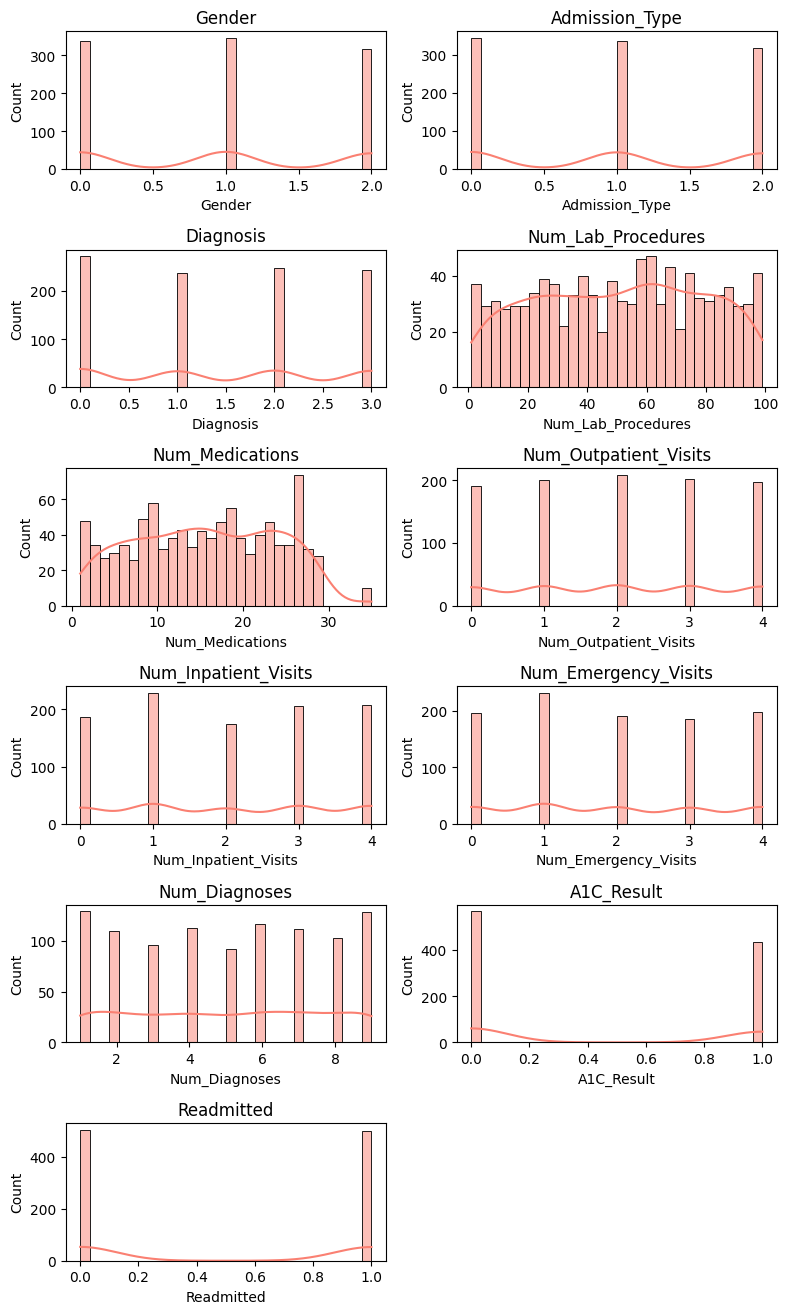

In [61]:
columns = final_df.columns
plot_histograms(final_df, columns)

In [62]:
final_df.skew()

Gender                   0.036436
Admission_Type           0.049547
Diagnosis                0.033828
Num_Lab_Procedures      -0.051773
Num_Medications          0.009162
Num_Outpatient_Visits   -0.013153
Num_Inpatient_Visits     0.010843
Num_Emergency_Visits     0.080239
Num_Diagnoses           -0.018829
A1C_Result               0.266731
Readmitted               0.012018
dtype: float64

    Skewness is a measure of lack of symmetry
    Skewness value range from -1 to 1:

- If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If the skewness is less than -0.5, the distribution is negatively skewed (left-skewed).
- If the skewness is greater than 0.5, the distribution is positively skewed (right-sk

In [63]:
# Checking for multicollinearity

In [64]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [65]:
calc_vif(final_df)

,variables,VIF
0,Gender,2.310514
1,Admission_Type,2.317428
2,Diagnosis,2.460125
3,Num_Lab_Procedures,3.781803
4,Num_Medications,4.087368
5,Num_Outpatient_Visits,2.865309
6,Num_Inpatient_Visits,2.795235
7,Num_Emergency_Visits,2.795893
8,Num_Diagnoses,4.022052
9,A1C_Result,1.724583


Variance Inflation Factor

- VIF values below 5 indicate that multicollinearity is not a significant concern, and the predictor variables are likely not highly correlated with each other.
- VIF values between 5 and 10 suggest moderate multicollinearity.
- VIF values above 10 indicate potentially severe multicollinearity.



#  Model to Readmission

In [66]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import pickle

In [67]:
final_df.columns

Index(['Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result', 'Readmitted'],
      dtype='object')

In [68]:
final_df["Readmitted"].value_counts()

Readmitted
0    503
1    497
Name: count, dtype: int64

In [69]:
# Data Splitting

x_new = final_df.drop(columns=["Readmitted"],axis=1) #independent variables.
y_new = final_df["Readmitted"] #dependent variable

In [70]:
# Logistic Regression

# splitting train & test 
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "Logistic Regression",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'Logistic Regression', 'Accuracy_Train': 0.56625, 'Accuracy_Test': 0.515}


In [71]:
# SVM Classification

# splitting train & test 
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
model = svm.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "SVM",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'SVM', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.49}


In [72]:
# Other classification algorithms

def accuracy_checking(x_data, y_data, algorithm):
    
    # splitting train & test
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=40)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking the accuracy_score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_Test": accuracy_test}
    return metrics

In [73]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.45}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.515}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.53}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.5925, 'Accuracy_Test': 0.5}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8, 'Accuracy_Test': 0.485}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.505}


## Cross Validation

In [74]:
# StratifiedKFold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Instantiate the classification model
A1C_Model = GradientBoostingClassifier()

# Instantiate Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation and calculate accuracy for each fold
accuracy_scores = cross_val_score(model, x_new, y_new, scoring='accuracy', cv=skf)
mean_accuracy = np.mean(accuracy_scores)

# Print
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)


Accuracy scores for each fold: [0.495 0.505 0.505 0.475 0.485]
Mean Accuracy: 0.493


In [75]:
# Selected Model
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 50)

Readmission_Model = GradientBoostingClassifier().fit(x_train, y_train)
 
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

### Performance Metrics

In [76]:
# accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.895
Accuracy_Test:  0.91


In [77]:
# confution matrics 

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

Confution_matrix for Test
--------------------------
[[99 17]
 [ 1 83]]


In [78]:
# classification report typically includes metrics such as precision, recall, F1-score, and support

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       116
           1       0.83      0.99      0.90        84

    accuracy                           0.91       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



In [79]:
# Receiver Operating Characteristic (ROC) Curve

FP, TP, Threshold = roc_curve(y_true=y_test, y_score=y_pred_test)

print(FP)
print(TP)
print(Threshold)


[0.         0.14655172 1.        ]
[0.         0.98809524 1.        ]
[inf  1.  0.]


In [80]:
# Area Under the Curve (AUC)

auc_curve = auc(x=FP, y=TP)
print("auc_curve: ", auc_curve)

auc_curve:  0.9207717569786535


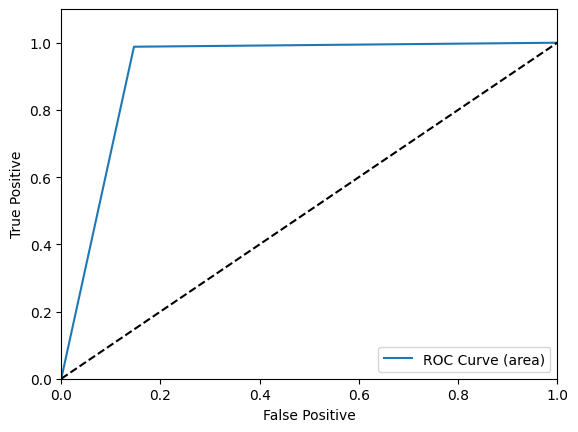

In [81]:
# create a plot for ROC and AUC curve

roc_point= {"ROC Curve (area)":round(auc_curve, 2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [82]:
# Saving the Model unsing pickle
with open("Readmission_Model.pkl","wb") as m:
    pickle.dump(Readmission_Model, m)

In [83]:
final_df.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,0,2,1,75,29,4,0,3,5,1,0
1,0,0,1,28,19,4,0,3,7,1,1
2,1,2,2,70,23,1,2,4,6,1,0
3,1,1,3,41,24,4,0,0,3,0,0
4,0,1,3,68,14,2,4,2,5,0,0


# END

In [84]:
# testing
user_data = np.array([[0,2,1,75,29,4,0,3,5,1]])
prediction = Readmission_Model.predict(user_data)
prediction[0]

np.int64(0)

In [85]:
x_new.columns

Index(['Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result'],
      dtype='object')

In [86]:
# Min & Max of each Column
min_values = x_new.min()
max_values = x_new.max()

# Concatenate min_values and max_values along the columns axis
min_max_df = pd.concat([min_values, max_values], axis=1)
min_max_df.columns = ['Minimum', 'Maximum']

print("Minimum and Maximum values of all columns:")
print(" ")
print(min_max_df)

Minimum and Maximum values of all columns:
 
                       Minimum  Maximum
Gender                       0        2
Admission_Type               0        2
Diagnosis                    0        3
Num_Lab_Procedures           1       99
Num_Medications              1       35
Num_Outpatient_Visits        0        4
Num_Inpatient_Visits         0        4
Num_Emergency_Visits         0        4
Num_Diagnoses                1        9
A1C_Result                   0        1
